In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib widget
%pylab

from Xana import Xana
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

Using matplotlib backend: module://ipympl.backend_nbagg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Import elog

In [2]:
elog = pd.read_pickle("../02-sources/elog")

In [3]:
elog.columns

Index(['Run n', 'Sample', 'Sample no. (label)', 'folder', 'scan number',
       'Short comment', 'cooling rate (K/min)', 'Target temperature (K)',
       'Detector', 'Beam size (um)', '# Si absorber (25um each)',
       'transmission', 'Exposure time per frame (s)', 'number of frames',
       'Total exposure time (s)', 'Mesh (spots x lines)', 'comments'],
      dtype='object')

In [4]:
elog.loc[15:20]

,Run n,Sample,Sample no. (label),folder,scan number,Short comment,cooling rate (K/min),Target temperature (K),Detector,Beam size (um),# Si absorber (25um each),transmission,Exposure time per frame (s),number of frames,Total exposure time (s),Mesh (spots x lines),comments
15,2,Aerogel,NaN,Aerogel_01_100x100,NaN,single shot,NaN,NaN,e4m,100,0.0,NaN,NaN,NaN,NaN,NaN,NaN
16,3,Aerogel,NaN,Aerogel_01_100x100_00001,NaN,series,NaN,NaN,e4m,100,12.0,NaN,NaN,NaN,NaN,NaN,NaN
17,4,Aerogel,NaN,Aerogel_01_100x100_00002,NaN,series,NaN,NaN,e4m,100,0.0,NaN,NaN,NaN,NaN,NaN,NaN
18,5,Aerogel,NaN,Aerogel_01_75x75,NaN,single shot,NaN,NaN,e4m,75,0.0,NaN,NaN,NaN,NaN,NaN,NaN
19,6,Aerogel,NaN,Aerogel_01_75x75_00001,NaN,series,NaN,NaN,e4m,75,12.0,NaN,NaN,NaN,NaN,NaN,NaN
20,7,Aerogel,NaN,Aerogel_01_75x75_00002,NaN,series,NaN,NaN,e4m,75,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
elog[elog['folder'].str.contains('HydLys_0p25_2', na=False)]
# elog[elog['Sample'].str.contains('blank', na=False)]

,Run n,Sample,Sample no. (label),folder,scan number,Short comment,cooling rate (K/min),Target temperature (K),Detector,Beam size (um),# Si absorber (25um each),transmission,Exposure time per frame (s),number of frames,Total exposure time (s),Mesh (spots x lines),comments
555,446,hyd lys h0.25,1.1,HydLys_0p25_2_00001,NaN,"fluences, changed beam size!",NaN,290,NaN,30x30,0.0,NaN,"0,5",2000.0,1000,NaN,NaN
556,447,hyd lys h0.25,1.1,HydLys_0p25_2_00002,NaN,fluences,NaN,290,NaN,30x30,3.0,NaN,"0,5",2000.0,1000,NaN,NaN
557,448,hyd lys h0.25,1.1,HydLys_0p25_2_00003,NaN,fluences,NaN,290,NaN,30x30,6.0,NaN,"0,5",2000.0,1000,NaN,NaN
558,449,hyd lys h0.25,1.1,HydLys_0p25_2_00004,NaN,fluences,NaN,290,NaN,30x30,9.0,NaN,"0,5",2000.0,1000,NaN,NaN
559,450,hyd lys h0.25,1.1,HydLys_0p25_2_00005,NaN,temperatures epseries,NaN,280,NaN,30x30,6.0,NaN,"0,5",2000.0,1000,NaN,NaN
560,451,hyd lys h0.25,1.1,HydLys_0p25_2_00006,NaN,temperatures epseries,NaN,270,NaN,30x30,6.0,NaN,"0,5",2000.0,1000,NaN,NaN
561,452,hyd lys h0.25,1.1,HydLys_0p25_2_00007,NaN,temperatures epseries,NaN,260,NaN,30x30,6.0,NaN,"0,5",2000.0,1000,NaN,NaN
562,453,hyd lys h0.25,1.1,HydLys_0p25_2_00008,NaN,temperatures epseries,NaN,250,NaN,30x30,6.0,NaN,"0,5",2000.0,1000,NaN,NaN
563,454,hyd lys h0.25,1.1,HydLys_0p25_2_00009,NaN,temperatures epseries,NaN,240,NaN,30x30,6.0,NaN,"0,5",2000.0,1000,NaN,NaN
564,455,hyd lys h0.25,1.1,HydLys_0p25_2_00010,NaN,temperatures epseries,NaN,230,NaN,30x30,6.0,NaN,"0,5",2000.0,1000,NaN,NaN


# save mask

In [6]:
!ls ../03-masks/

G2p1_NP_2_180_00005_00.npy     HydLys_0p25_2_00015_00.npy
HydLys_0p25_2_00001_00_g.npy   HydLys_0p29_2_00001_00.npy
HydLys_0p25_2_00001_00.npy     HydLys_0p29_2_00002_00.npy
HydLys_0p25_2_00002_00_g.npy   HydLys_0p29_2_00003_00.npy
HydLys_0p25_2_00002_00.npy     HydLys_0p29_2_00004_00.npy
HydLys_0p25_2_00003_00_g.npy   HydLys_0p29_2_00005_00.npy
HydLys_0p25_2_00003_00.npy     HydLys_0p29_2_00006_00.npy
HydLys_0p25_2_00004_00_g.npy   HydLys_0p29_2_00007_00.npy
HydLys_0p25_2_00004_00.npy     HydLys_0p29_2_00008_00.npy
HydLys_0p25_2_00005_00_02.npy  HydLys_0p29_2_00009_00.npy
HydLys_0p25_2_00005_00_03.npy  HydLys_0p29_2_00010_00.npy
HydLys_0p25_2_00005_00_g.npy   HydLys_0p29_2_00011_00.npy
HydLys_0p25_2_00005_00.npy     HydLys_0p29_2_00012_00.npy
HydLys_0p25_2_00005_g.npy      HydLys_0p29_2_00013_00.npy
HydLys_0p25_2_00006_00_g.npy   HydLys_0p29_2_00014_00.npy
HydLys_0p25_2_00006_00.npy     HydLys_0p29_2_00015_00.npy
HydLys_0p25_2_00006_g.npy      HydLys_0p29_3_00004_00.npy
HydLys_0p25_2_

In [7]:
m = np.load('../03-masks/mask_waxs_pyFAI.npy')
mask = np.array(m, dtype=bool)

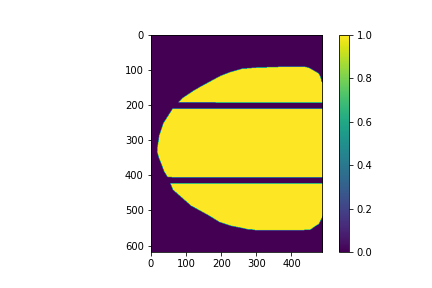

In [8]:
plt.figure()
plt.imshow(~mask)
plt.colorbar()
plt.show()

In [9]:
# np.save('../03-masks/p300_mask_221130.npy', ~mask)

# Plot all masks saved

In [3]:
ls ../03-masks/

HydLys_0p25_2_00001_00.npy     HydLys_0p29_3_00004_00.npy
HydLys_0p25_2_00003_00.npy     HydLys_0p29_3_00006_00.npy
HydLys_0p25_2_00005_00_02.npy  HydLys_0p29_3_00007_00.npy
HydLys_0p25_2_00005_00_03.npy  HydLys_0p29_3_00008_00.npy
HydLys_0p25_2_00005_00.npy     HydLys_0p29_3_00009_00.npy
HydLys_0p25_2_00006_00.npy     HydLys_0p29_3_00010_00.npy
HydLys_0p25_2_00007_00.npy     HydLys_0p29_3_00011_00.npy
HydLys_0p25_2_00008_00.npy     HydLys_0p29_3_00013_00.npy
HydLys_0p25_2_00009_00.npy     mask-05-pyFAI.npy
HydLys_0p25_2_00010_00.npy     mask-eiger4m-01.npy
HydLys_0p25_2_00011_00.npy     mask-eiger4m-02.npy
HydLys_0p25_2_00012_00.npy     mask-eiger4m-03.npy
HydLys_0p25_2_00013_00.npy     mask-eiger4m-04.npy
HydLys_0p25_2_00014_00.npy     p300_mask.npy
HydLys_0p25_2_00015_00.npy


In [9]:
from glob import glob

In [19]:
ls /asap3/petra3/gpfs/p10/2022/data/11014696/scratch_cc/masks/

e4m_mask_sharon_20220903_01.npy  mask-eiger4m-03.npy
eiger4m_day1_4.npy               pilatus_mask_01.npy


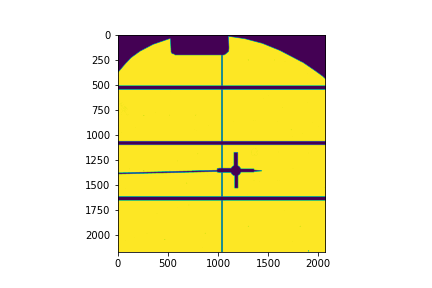

In [6]:
ms1 = np.load('../03-masks/mask-eiger4m-02.npy')
ms2 = np.load('/asap3/petra3/gpfs/p10/2022/data/11014696/scratch_cc/masks/mask-eiger4m-03.npy')

plt.figure()
m = np.load('../03-masks/mask-eiger4m-05-grande.npy') 
plt.imshow(m)
# plt.imshow(ms1*ms2)
# new_mask = ms1*ms2
# np.save('../03-masks/mask-eiger4m-05-grande.npy', new_mask)
plt.show()

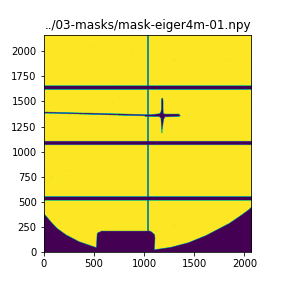

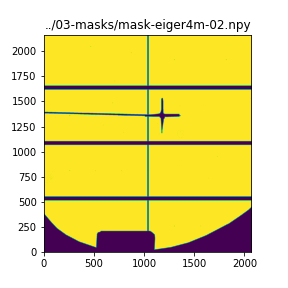

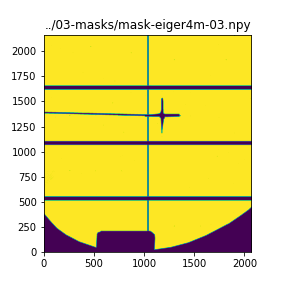

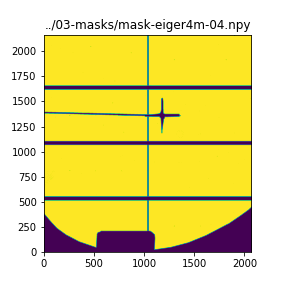

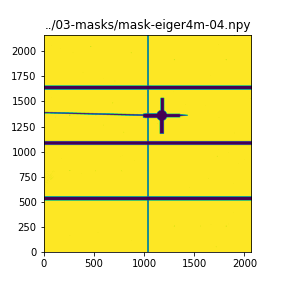

In [20]:
masks = sort(glob('../03-masks/mask-eiger**.npy', recursive=True))
for i in range(len(masks)):
    plt.figure(figsize=(4,4))
    msk = np.load(masks[i])
    plt.imshow(msk, origin='lower')
    plt.title(masks[i])
    plt.show()
plt.figure(figsize=(4,4))
msk = np.load('/asap3/petra3/gpfs/p10/2022/data/11014696/scratch_cc/masks/mask-eiger4m-03.npy')
plt.imshow(msk, origin='lower')
plt.title(masks[i])
plt.show()

# Make Setup

### Initialize Xana and Load Data

In [2]:
rawdir = '/asap3/petra3/gpfs/p10/2022/data/11014696/raw/'

In [3]:
sample = 'HydLys_0p25_2'
run_series = 1

In [4]:
maskfile = '../03-masks/mask-eiger4m-01.npy'
#setup = '.../slurming/tests/setup_e4m_2022-09-01.pkl'

In [5]:
d = Xana(fmtstr='p10_eiger_h5', detector='eiger4m',maskfile=maskfile)

In [6]:
d.connect(f'{rawdir}{sample}_{run_series:05d}')
d.meta

,series,subset,t_delay,t_exposure,t_readout,nframes,first,last,master,datdir
0,1,0,0.503,0.5,0.00001,2000,0,1999,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...


**Read 2d images and plot**

In [7]:
database_id = d.meta[d.meta['series']==run_series].index.values
#filename = d.meta.loc[database_id, 'master']
print(f"The database_id selected is: {database_id}")

The database_id selected is: [0]


In [8]:
data = d.get_series(database_id[0], verbose=True, first=1, last=300)
print(print(f"Loaded data with shape {np.shape(data)}"))

H5 file using external links.
First images is:  1
Last image is:  300
Loading data in chunks of 200 images.
[============================================================] 100.0%...
Loaded data with shape (300, 2167, 2070)
None


In [9]:
avr = data.mean(0)

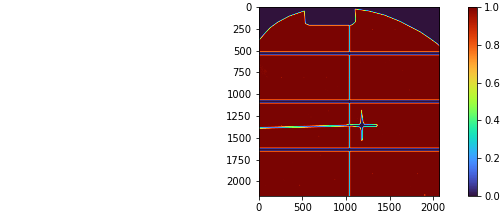

In [10]:
figure(figsize=(7,3), constrained_layout=True)
imshow(d.setup.mask, cmap='turbo', vmax=1, vmin=0)#, norm=LogNorm())
colorbar()

Averaged intensity per image: 2.40e+08


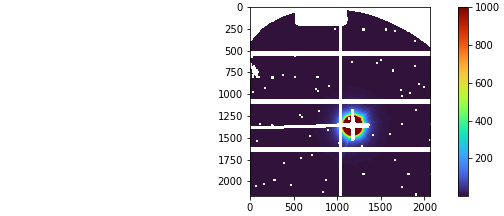

In [11]:
avr[d.setup.mask==0] = np.nan
print(f"Averaged intensity per image: {np.average(data):.2e}")

figure(figsize=(7,3), constrained_layout=True)
imshow(avr, cmap='turbo', vmax=1000, vmin=1)#, norm=LogNorm())
colorbar()

In [12]:
# np.save('../02-sources/img_avg_blank.npy', avr)
# np.save('../02-sources/img_100_blank.npy', data[:100].mean(0))
# np.save('../02-sources/img_1_.npy', data[1])

### Define setup

In [12]:
!ls ../04-setups

analysis_database.pkl
eiger4m-03-powders-01.pkl
eiger4m-03-powders-02-test.pkl
eiger4m-03-powders-03.pkl
eiger4m-03-powders-phis-02.pkl
eiger4m-03-powders-phis.pkl
setup-G2p1_NP_2_180_00002_dbid00.pkl
setup-G2p1_NP_2_180_00005_dbid00.pkl
setup-HydLys_0p25_2_00001_dbid00.pkl
setup-HydLys_0p25_2_00002_dbid00.pkl
setup-HydLys_0p25_2_00003_dbid00-phis.pkl
setup-HydLys_0p25_2_00003_dbid00.pkl
setup-HydLys_0p25_2_00004_dbid00-phis.pkl
setup-HydLys_0p25_2_00004_dbid00.pkl
setup-HydLys_0p25_2_00005_dbid00-phis.pkl
setup-HydLys_0p25_2_00005_dbid00.pkl
setup-HydLys_0p25_2_00006_dbid00-phis.pkl
setup-HydLys_0p25_2_00006_dbid00.pkl
setup-HydLys_0p25_2_00007_dbid00-phis.pkl
setup-HydLys_0p25_2_00007_dbid00.pkl
setup-HydLys_0p25_2_00008_dbid00-phis.pkl
setup-HydLys_0p25_2_00008_dbid00.pkl
setup-HydLys_0p25_2_00009_dbid00-phis.pkl
setup-HydLys_0p25_2_00009_dbid00.pkl
setup-HydLys_0p25_2_00010_dbid00-phis.pkl
setup-HydLys_0p25_2_00010_dbid00.pkl
setup-HydLys_0p25_2_00011_dbid00-phis.pkl
setup-HydLys_0

In [13]:
setup = pd.read_pickle('../04-setups/eiger4m-03-powders-01.pkl')

In [16]:
setup.dqv

array([0.017, 0.017, 0.017, 0.017, 0.017, 0.017, 0.017, 0.017, 0.017,
       0.017, 0.017])

In [20]:
setup.qv, setup.qv_init

(array([0.005, 0.025, 0.045, 0.065, 0.085, 0.105, 0.125, 0.145, 0.165,
        0.185, 0.205]),
 array([[0.005, 0.017],
        [0.025, 0.017],
        [0.045, 0.017],
        [0.065, 0.017],
        [0.085, 0.017],
        [0.105, 0.017],
        [0.125, 0.017],
        [0.145, 0.017],
        [0.165, 0.017],
        [0.185, 0.017],
        [0.205, 0.017]]))

In [19]:
#np.save("../02-setups/mask-duke", mask)

In [19]:
d.defineqrois??

Added the following Q-values [nm-1]:
[0.03 0.03 0.03 0.03 0.06 0.06 0.06 0.06 0.09 0.09 0.09 0.09 0.12 0.12
 0.12 0.12 0.15 0.15 0.15 0.15]


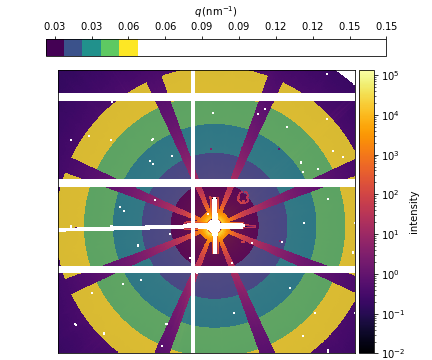

In [30]:
d.setup.make(**{'center': [1174, 1356], # [1174, 1355] position of the direct beam in pixels
                'wavelength': 1.3766667, # X-ray wavelength in Angstrom
                'distance': 21.2 # sample-detector distance in m
               }
            )

# q-vector and width in nm-1
# qv_init = [(np.arange(0.05, 0.21, 0.015), 0.015)]
qv_init = [(np.arange(0.03, 0.18, 0.03), 0.03)]

# anglular slices in degress (10, 150) with a width of 30 degrees
phiv_init = [([0, 45, 90, 135], 40)]

d.defineqrois(avr, qv_init=qv_init, plot='ROIS', d=1000, mirror=True, phiv_init=phiv_init)

In [31]:
!ls ../04-setups

analysis_database.pkl
eiger4m-03-powders-01.pkl
eiger4m-03-powders-02-test.pkl
eiger4m-03-powders-03.pkl
eiger4m-03-powders-phis-02.pkl
eiger4m-03-powders-phis.pkl
setup-G2p1_NP_2_180_00002_dbid00.pkl
setup-G2p1_NP_2_180_00005_dbid00.pkl
setup-HydLys_0p25_2_00001_dbid00.pkl
setup-HydLys_0p25_2_00002_dbid00.pkl
setup-HydLys_0p25_2_00003_dbid00-phis.pkl
setup-HydLys_0p25_2_00003_dbid00.pkl
setup-HydLys_0p25_2_00004_dbid00-phis.pkl
setup-HydLys_0p25_2_00004_dbid00.pkl
setup-HydLys_0p25_2_00005_dbid00-phis.pkl
setup-HydLys_0p25_2_00005_dbid00.pkl
setup-HydLys_0p25_2_00006_dbid00-phis.pkl
setup-HydLys_0p25_2_00006_dbid00.pkl
setup-HydLys_0p25_2_00007_dbid00-phis.pkl
setup-HydLys_0p25_2_00007_dbid00.pkl
setup-HydLys_0p25_2_00008_dbid00-phis.pkl
setup-HydLys_0p25_2_00008_dbid00.pkl
setup-HydLys_0p25_2_00009_dbid00-phis.pkl
setup-HydLys_0p25_2_00009_dbid00.pkl
setup-HydLys_0p25_2_00010_dbid00-phis.pkl
setup-HydLys_0p25_2_00010_dbid00.pkl
setup-HydLys_0p25_2_00011_dbid00-phis.pkl
setup-HydLys_0

In [32]:
# maskfile = np.load('../03-masks/mask-eiger4m-01.npy')
maskfile = np.load('/asap3/petra3/gpfs/p10/2022/data/11014696/processed/maddalena/03-masks/mask-eiger4m-05-grande.npy')
d.setup.mask = maskfile

d.mksavdir('../04-setups')
d.savesetup(f'eiger4m-03-powders-phis-03', handle_existing='overwrite')

Changing savdir to:
	/asap3/petra3/gpfs/p10/2022/data/11014696/processed/maddalena/04-setups/
Try loading database:
	/asap3/petra3/gpfs/p10/2022/data/11014696/processed/maddalena/04-setups/analysis_database.pkl
Successfully loaded database

Results saved to:
	/asap3/petra3/gpfs/p10/2022/data/11014696/processed/maddalena/04-setups/eiger4m-03-powders-phis-03.pkl


# Matlab mask

In [6]:
import scipy.io

In [7]:
ls /asap3/petra3/gpfs/p10/2022/data/11014696/shared/Masks

Mask_01_e4m_full.mat  Mask_02_e500_full.mat  Mask_04_e4m_part.mat
Mask_02_e4m_full.mat  Mask_03_e4m_part.mat   p300_mask_9_3_2022.edf


In [94]:
mat = scipy.io.loadmat('/asap3/petra3/gpfs/p10/2022/data/11014696/shared/Masks/Mask_02_e4m_full.mat')

In [95]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'MaskInfo'])

In [100]:
mat['MaskInfo']

array([[(array([[ 894, 1100],
               [ 897, 1547],
               [1401, 1548],
               [1401, 1072]], dtype=uint16), array([[3]], dtype=uint8), array([[array([[ 887, 1343],
                       [1136, 1348],
                       [1149, 1334],
                       [1165, 1322],
                       [1180, 1321],
                       [1195, 1327],
                       [1206, 1338],
                       [1210, 1352],
                       [1209, 1368],
                       [1199, 1380],
                       [1186, 1389],
                       [1164, 1388],
                       [1147, 1378],
                       [1135, 1369],
                       [ 886, 1371]], dtype=uint16),
                array([[1164, 1375],
                       [1170, 1534],
                       [1172, 1557],
                       [1177, 1555],
                       [1181, 1379]], dtype=uint16),
                array([[1197, 1350],
                       [1409, 1353],
  

In [103]:
to_mask = np.array([[ 894, 1100],
               [ 897, 1547],
               [1401, 1548],
               [1401, 1072],
                   [ 887, 1343],
                       [1136, 1348],
                       [1149, 1334],
                       [1165, 1322],
                       [1180, 1321],
                       [1195, 1327],
                       [1206, 1338],
                       [1210, 1352],
                       [1209, 1368],
                       [1199, 1380],
                       [1186, 1389],
                       [1164, 1388],
                       [1147, 1378],
                       [1135, 1369],
                       [ 886, 1371],
                   [1164, 1375],
                       [1170, 1534],
                       [1172, 1557],
                       [1177, 1555],
                       [1181, 1379],
                   [1197, 1350],
                       [1409, 1353],
                       [1409, 1366],
                       [1194, 1365], ])
np.shape(to_mask)

(28, 2)

In [53]:
to_mask = np.array([ [ 866, 1153],
       [ 865, 1586],
       [1454, 1589],
       [1452, 1152],
           [1169, 1377],
               [1164, 1592],
               [1177, 1593],
               [1179, 1377],
           [1198, 1361],
               [1456, 1359],
               [1456, 1350],
               [1198, 1355],
           [1179, 1331],
               [1179, 1146],
               [1170, 1147],
               [1172, 1331],
                    [ 857, 1347],
               [1139, 1346],
               [1148, 1336],
               [1160, 1328],
               [1169, 1325],
               [1180, 1325],
               [1190, 1325],
               [1200, 1329],
               [1204, 1335],
               [1208, 1343],
               [1210, 1354],
               [1210, 1367],
               [1206, 1379],
               [1197, 1385],
               [1185, 1388],
               [1168, 1389],
               [1159, 1388],
               [1148, 1382],
               [1141, 1373],
               [1140, 1370],
               [1140, 1365],
               [ 860, 1371],])
np.shape(to_mask)

(38, 2)

In [59]:
mat_test = np.ones(shape=my_mask.shape)

for i in range(len(to_mask)):
    x = to_mask[i,0]
    y = to_mask[i,1]
    mat_test[x,y] = 0

In [63]:
mat_test[861, 1371]

1.0

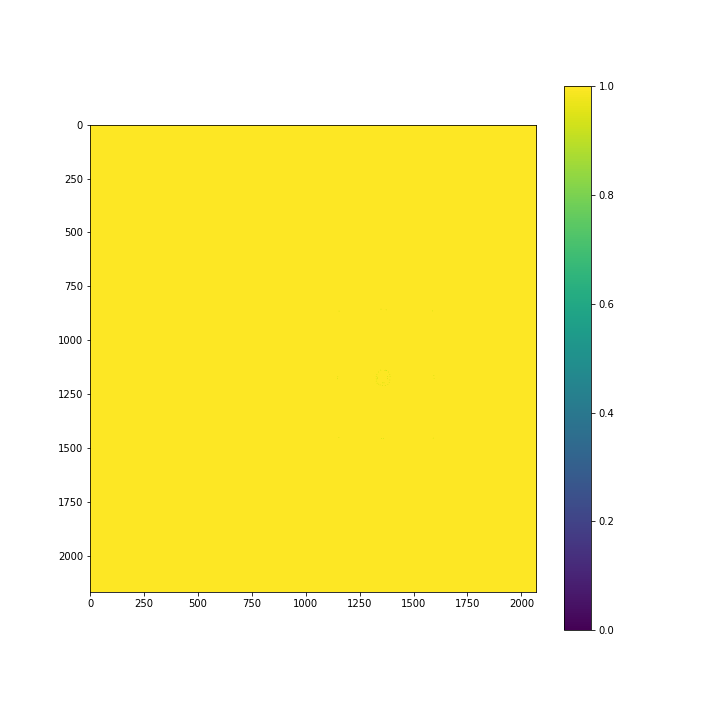

In [65]:
# mat_test = np.ones(shape=my_mask.shape)
# mat_test2 = mat_test[mat_test[to_mask]==1]
plt.figure(figsize=(10,10))
plt.imshow(mat_test)
# plt.xlim(860,862)
# plt.ylim(1370,1372)
plt.colorbar()
plt.show()

**My mask**

In [22]:
ls ../03-masks

HydLys_0p25_2_00001_00.npy  HydLys_0p25_2_00015_00.npy
HydLys_0p25_2_00003_00.npy  HydLys_0p29_3_00004_00.npy
HydLys_0p25_2_00005_00.npy  HydLys_0p29_3_00006_00.npy
HydLys_0p25_2_00006_00.npy  HydLys_0p29_3_00007_00.npy
HydLys_0p25_2_00007_00.npy  HydLys_0p29_3_00008_00.npy
HydLys_0p25_2_00008_00.npy  HydLys_0p29_3_00009_00.npy
HydLys_0p25_2_00009_00.npy  HydLys_0p29_3_00010_00.npy
HydLys_0p25_2_00010_00.npy  HydLys_0p29_3_00011_00.npy
HydLys_0p25_2_00011_00.npy  HydLys_0p29_3_00013_00.npy
HydLys_0p25_2_00012_00.npy  mask-05-pyFAI.npy
HydLys_0p25_2_00013_00.npy  mask-eiger4m-01.npy
HydLys_0p25_2_00014_00.npy  p300_mask.npy


In [104]:
my_mask = np.load('../03-masks/mask-eiger4m-01.npy')

In [105]:
my_mask.shape

(2167, 2070)

In [106]:
# mat_test = np.ones(shape=my_mask.shape)

for i in range(len(to_mask)):
    x = to_mask[i,0]
    y = to_mask[i,1]
    my_mask[x,y] = 0
# my_mask[:,2167]
# my_mask[2070,:]
# my_mask[28,:]
# my_mask[:,28]

In [90]:
mat_test = np.ones(shape=my_mask.shape)
mat_test[866, 1153] = 0

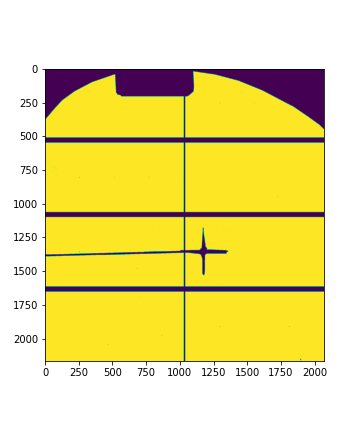

In [107]:
plt.figure(figsize=(5,6))
plt.imshow(my_mask)
# plt.plot(866, 1153, marker='s', c='r', fillstyle='none')
# plt.axvline(x=2070, c='r', fillstyle='none')
# plt.axhline(y=28, c='g', fillstyle='none')
# plt.axvline(x=28, c='g', fillstyle='none')
# plt.axhline(y=2167, c='r', fillstyle='none')

# plt.imshow(mat_test, cmap='jet_r', alpha=.5)
# plt.xlim(850,870)
# plt.ylim(1140,1160)
plt.show()

In [108]:
np.save('../03-masks/mask-eiger4m-04.npy', my_mask)

In [93]:
ls ../03-masks

HydLys_0p25_2_00001_00.npy     HydLys_0p29_3_00004_00.npy
HydLys_0p25_2_00003_00.npy     HydLys_0p29_3_00006_00.npy
HydLys_0p25_2_00005_00_02.npy  HydLys_0p29_3_00007_00.npy
HydLys_0p25_2_00005_00.npy     HydLys_0p29_3_00008_00.npy
HydLys_0p25_2_00006_00.npy     HydLys_0p29_3_00009_00.npy
HydLys_0p25_2_00007_00.npy     HydLys_0p29_3_00010_00.npy
HydLys_0p25_2_00008_00.npy     HydLys_0p29_3_00011_00.npy
HydLys_0p25_2_00009_00.npy     HydLys_0p29_3_00013_00.npy
HydLys_0p25_2_00010_00.npy     mask-05-pyFAI.npy
HydLys_0p25_2_00011_00.npy     mask-eiger4m-01.npy
HydLys_0p25_2_00012_00.npy     mask-eiger4m-02.npy
HydLys_0p25_2_00013_00.npy     mask-eiger4m-03.npy
HydLys_0p25_2_00014_00.npy     p300_mask.npy
HydLys_0p25_2_00015_00.npy


In [109]:
m1 = np.load('../03-masks/HydLys_0p25_2_00001_00.npy')
m2 = np.load('../03-masks/mask-eiger4m-04.npy')

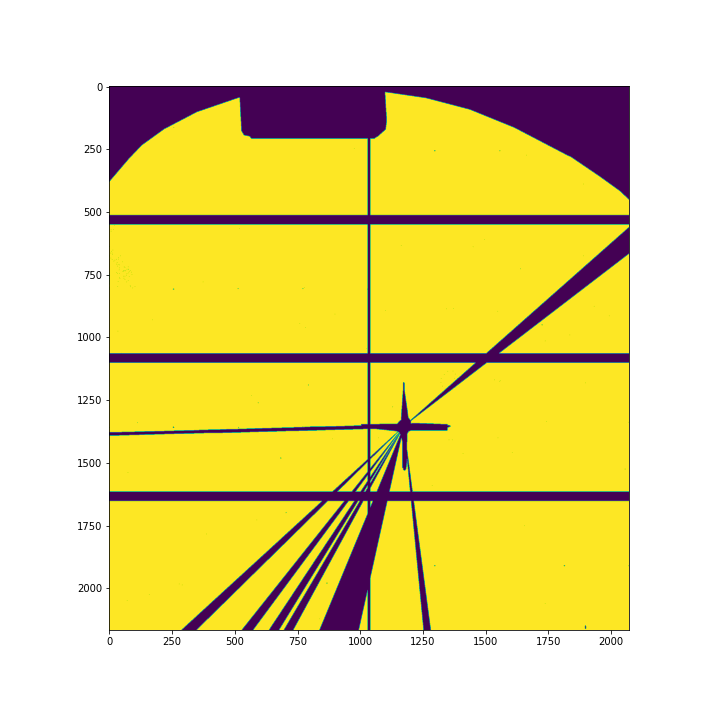

In [110]:
plt.figure(figsize=(10,10))
plt.imshow(m1*m2)
plt.show()